In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('IRIS.csv')

In [4]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


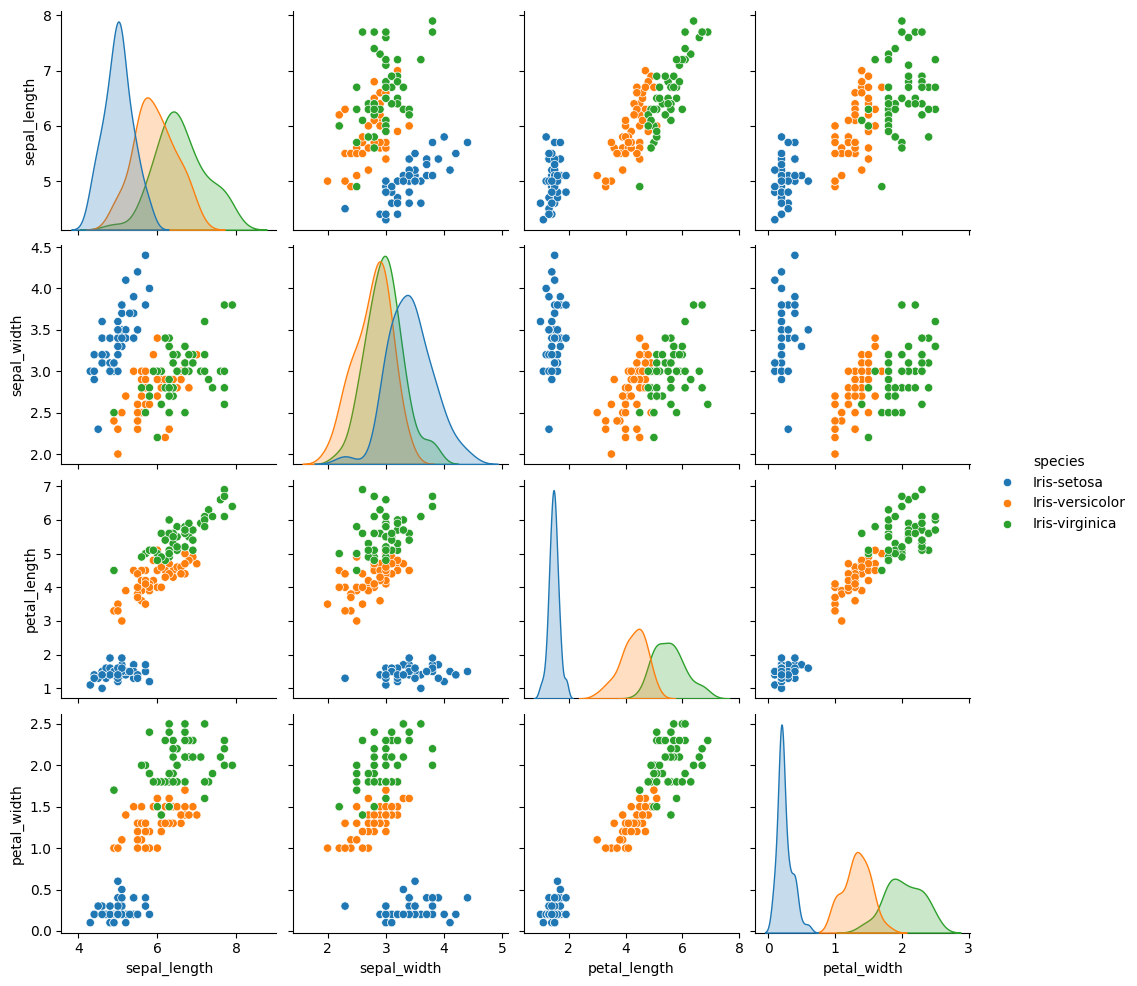

In [6]:
sns.pairplot(df,hue='species')

In [7]:
species = df['species'].tolist()
X = df.drop(columns = 'species')

In [8]:
X= (X-X.mean() /X.std(ddof=0))

In [9]:
X_corr = (1/150)*X.T.dot(X)

Text(0.5, 1.0, 'Correlation Matrix')

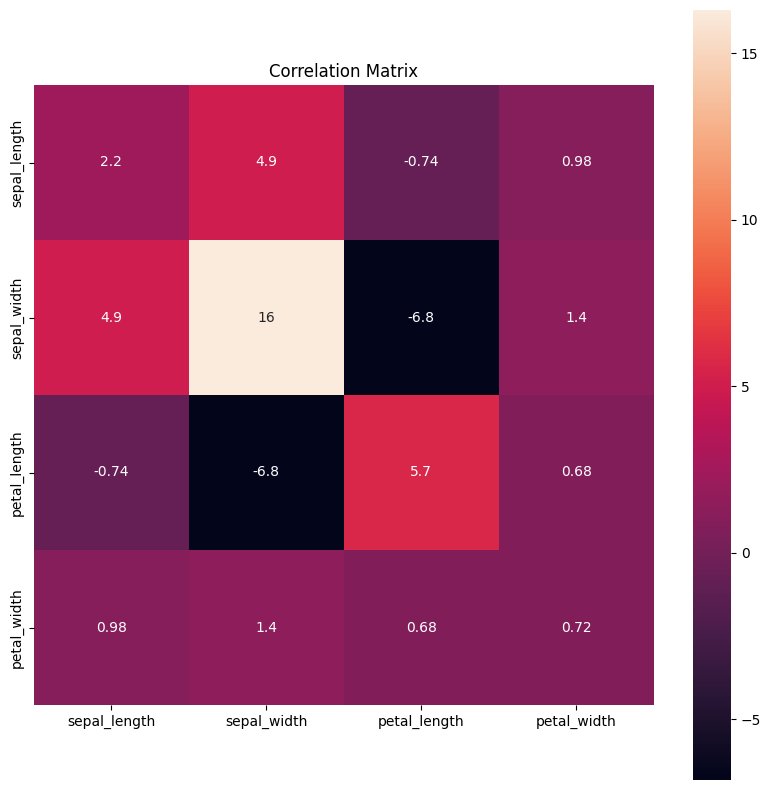

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(X_corr,square=True,annot=True)
plt.title('Correlation Matrix')

In [11]:
np.linalg.eig(X_corr)

EigResult(eigenvalues=array([20.92673652,  3.88940475,  0.10432603,  0.02370192]), eigenvectors=array([[ 0.25011643,  0.4633522 , -0.78561044,  0.32490421],
       [ 0.87804288,  0.19524255,  0.24509821, -0.36172907],
       [-0.40368757,  0.7695848 ,  0.12769798, -0.47798411],
       [ 0.0593197 ,  0.39360428,  0.55356691,  0.73151932]]))

In [12]:
explained_variance = (eig_values/np.sum(eig_values))*100
plt.bar(range(4),explained_variance,alpha=0.6)
plt.xlabel('Dimensions')
plt.ylabel('Percentage of explained variance')
plt.show()

NameError: name 'eig_values' is not defined

In [13]:
pc1= X.dot(eig_vectors[:,0])
pc2 = X.dot(eig_vectors[:,1])

NameError: name 'eig_vectors' is not defined

NameError: name 'pc1' is not defined

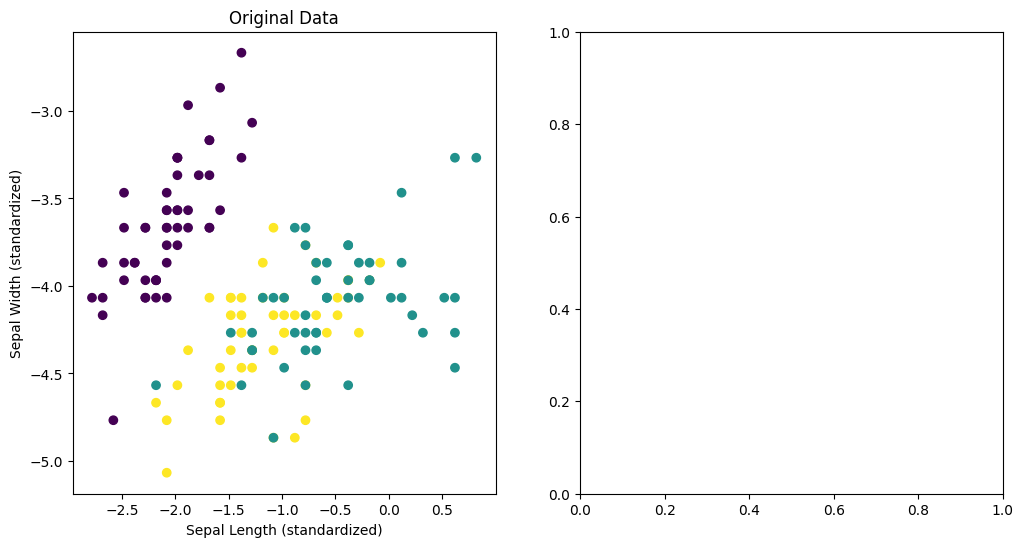

In [14]:
# Convert species names to numerical labels
species_numeric = np.zeros(len(species), dtype=int)
species_set = list(set(species))
for i in range(len(species)):
    species_numeric[i] = species_set.index(species[i])

# Plot PC1 and PC2
plt.figure(figsize=(12, 6))

# Original Data
plt.subplot(1, 2, 1)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=species_numeric, cmap='viridis')
plt.xlabel('Sepal Length (standardized)')
plt.ylabel('Sepal Width (standardized)')
plt.title('Original Data')

# PCA Transformed Data
plt.subplot(1, 2, 2)
plt.scatter(pc1, pc2, c=species_numeric, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Transformed Data')

plt.tight_layout()
plt.show()

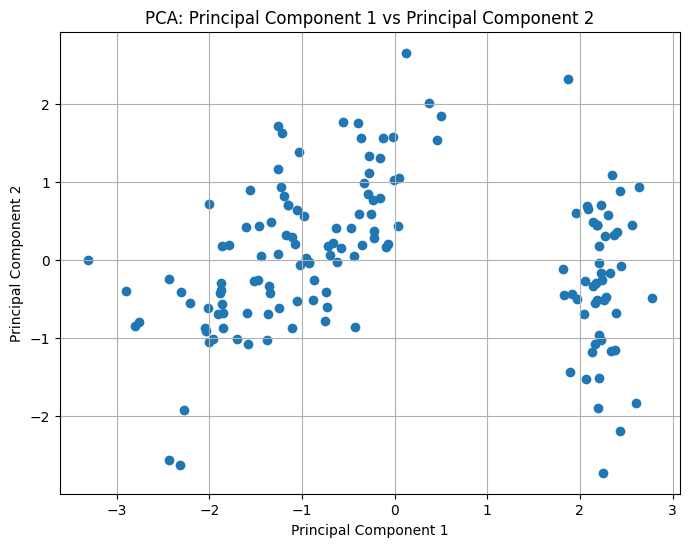

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('IRIS.csv')

# Import necessary libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Drop the 'species' column
X = df.drop(columns=['species'])

# Standardize the features
X = StandardScaler().fit_transform(X)

# Perform PCA
pca = PCA()
result = pca.fit_transform(X)

# Extract principal components
pc1 = -result[:, 0]  # Negating to match the given code
pc2 = -result[:, 1]  # Negating to match the given code

# Define plotting function
def plot_scatter(pc1, pc2):
    plt.figure(figsize=(8, 6))
    plt.scatter(pc1, pc2)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA: Principal Component 1 vs Principal Component 2')
    plt.grid(True)
    plt.show()

# Plot the scatter plot
plot_scatter(pc1, pc2)


In [24]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the labels
y = df['species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result, y, test_size=0.2, random_state=42)

# Initialize the Perceptron model
perceptron = Perceptron()

# Train the model
perceptron.fit(X_train, y_train)

# Predict on the test data
y_pred = perceptron.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.9666666666666667


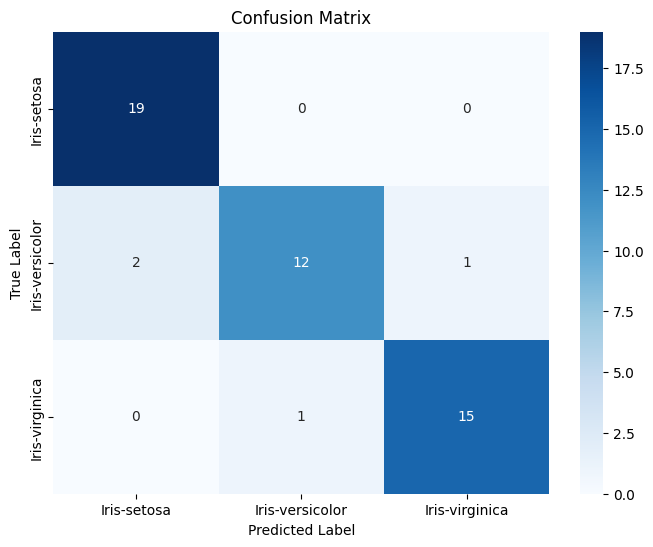

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=perceptron.classes_, yticklabels=perceptron.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

